# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

In [3]:
# Load each dataset into a DataFrame
df_census = pd.read_csv(adultDataSet_filename)
df_airbnb = pd.read_csv(airbnbDataSet_filename)
df_whr = pd.read_csv(WHRDataSet_filename)
df_book_reviews = pd.read_csv(bookReviewDataSet_filename)

In [4]:
# Inspect the Census data
print("Census Data Shape:", df_census.shape)
print("Census Data Columns:", df_census.columns)
print("Census Data Head:")
df_census.head()

Census Data Shape: (32561, 15)
Census Data Columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_binary'],
      dtype='object')
Census Data Head:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [5]:
# Inspect the Airbnb data
print("Airbnb Data Shape:", df_airbnb.shape)
print("Airbnb Data Columns:", df_airbnb.columns)
print("\nAirbnb Data Head:")
df_airbnb.head()

Airbnb Data Shape: (28022, 50)
Airbnb Data Columns: Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
   

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


In [6]:
# Inspect the World Happiness Report data
print("World Happiness Report Data Shape:", df_whr.shape)
print("World Happiness Report Data Columns:", df_whr.columns)
print("\nWorld Happiness Report Data Head:")
df_whr.head()

World Happiness Report Data Shape: (1562, 19)
World Happiness Report Data Columns: Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

World Happiness Report Data Head:


,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [7]:
# Inspect the Book Reviews data
print("Book Reviews Data Shape:", df_book_reviews.shape)
print("Book Reviews Data Columns:", df_book_reviews.columns)
print("\nBook Reviews Data Head:")
df_book_reviews.head()

Book Reviews Data Shape: (1973, 2)
Book Reviews Data Columns: Index(['Review', 'Positive Review'], dtype='object')

Book Reviews Data Head:


,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


### <b>Data Set Choice:</b> ### 

I have chosen the World Happiness Report data set for our machine learning project. This dataset provides unique insights into socio-economic factors and subjective well-being, making it an ideal choice for a meaningful and impactful analysis.

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

<b>Data Set Chosen</b>: World Happiness Report data set

<b>Prediction</b>: I will be predicting the "Life Ladder" score.

<b>Label</b>: "Life Ladder"

<b>Learning Problem Type</b>: This is a supervised learning problem.

<b>Problem Type</b>: This is a regression problem.

<b>Features</b>:
- Log GDP per capita
- Social support
- Healthy life expectancy at birth
- Freedom to make life choices
- Generosity
- Perceptions of corruption
- Positive affect
- Negative affect
- Confidence in national government
- Democratic Quality
- Delivery Quality
- GINI index (World Bank estimate)
- GINI index (World Bank estimate), average 2000-15
- gini of household income reported in Gallup, by wp5-year
  
<b>Importance</b>: Predicting the "Life Ladder" score is crucial for understanding the factors that contribute to overall happiness and well-being. Companies and governments can use this model to identify and enhance key areas that improve life satisfaction, inform policy decisions, and allocate resources effectively to improve public welfare.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

#### <b>Section 1: Data Preparation Techniques</b>

<b>Task 1.1: Load and Inspect Data</b>

In [8]:
import pandas as pd
import os

# Load the World Happiness Report data set
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
df = pd.read_csv(WHRDataSet_filename)

In [9]:
# Display the first few rows of the DataFrame
df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [10]:
# Display the summary statistics of the DataFrame
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
mean,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579
max,2017.000000,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,3.527820,1.022769,0.648000,0.626000,0.961435


In [11]:
# Display the data types of each column
df.dtypes

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

<b>Task 1.2: Address Missing Values</b>

In [12]:
# Check for missing values in the DataFrame
print(df.isnull().sum())

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

In [13]:
# Fill missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

/tmp/ipykernel_1571/3885790275.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [14]:
# Verify that there are no more missing values
print(df.isnull().sum())

country                                                     0
year                                                        0
Life Ladder                                                 0
Log GDP per capita                                          0
Social support                                              0
Healthy life expectancy at birth                            0
Freedom to make life choices                                0
Generosity                                                  0
Perceptions of corruption                                   0
Positive affect                                             0
Negative affect                                             0
Confidence in national government                           0
Democratic Quality                                          0
Delivery Quality                                            0
Standard deviation of ladder by country-year                0
Standard deviation/Mean of ladder by country-year           0
GINI ind

<b>Task 1.3: Rename Features and Labels</b>

In [15]:
# Rename columns for better readability with shorter names
df.rename(columns={
    'Life Ladder': 'Life_Ladder',
    'Log GDP per capita': 'GDP_per_capita',
    'Social support': 'Social_support',
    'Healthy life expectancy at birth': 'Life_expectancy',
    'Freedom to make life choices': 'Freedom_choices',
    'Generosity': 'Generosity',
    'Perceptions of corruption': 'Corruption',
    'Positive affect': 'Positive_affect',
    'Negative affect': 'Negative_affect',
    'Confidence in national government': 'Gov_confidence',
    'Democratic Quality': 'Democratic_Quality',
    'Delivery Quality': 'Delivery_Quality',
    'Standard deviation of ladder by country-year': 'Ladder_SD_country_year',
    'Standard deviation/Mean of ladder by country-year': 'Ladder_SD_Mean_country_year',
    'GINI index (World Bank estimate)': 'GINI_index',
    'GINI index (World Bank estimate), average 2000-15': 'GINI_avg_2000_15',
    'gini of household income reported in Gallup, by wp5-year': 'Gini_income_Gallup'
}, inplace=True)

# Display the DataFrame to verify the changes
df.head()

,country,year,Life_Ladder,GDP_per_capita,Social_support,Life_expectancy,Freedom_choices,Generosity,Corruption,Positive_affect,Negative_affect,Gov_confidence,Democratic_Quality,Delivery_Quality,Ladder_SD_country_year,Ladder_SD_Mean_country_year,GINI_index,GINI_avg_2000_15,Gini_income_Gallup
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,0.372846,0.386948,0.445204
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,0.372846,0.386948,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,0.372846,0.386948,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,0.372846,0.386948,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,0.372846,0.386948,0.344540


<b>Task 1.4: Detect and Handle Outliers</b>

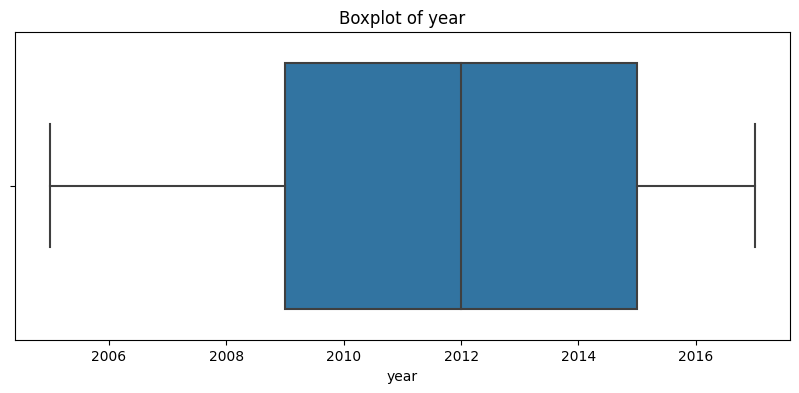

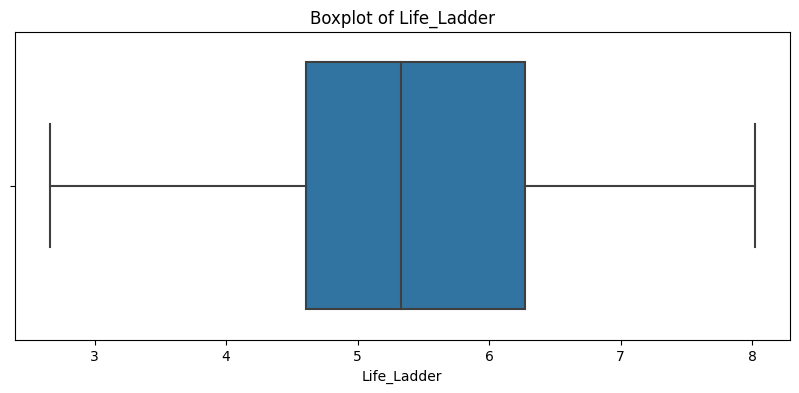

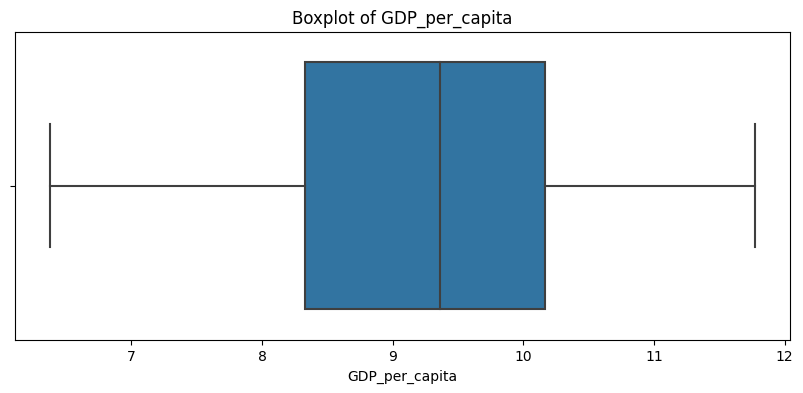

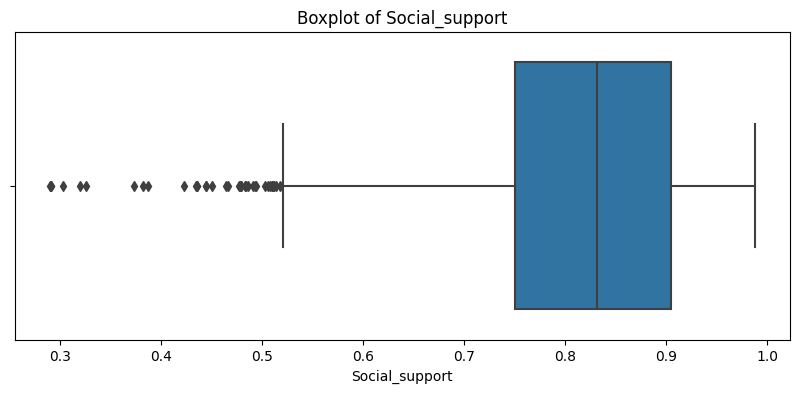

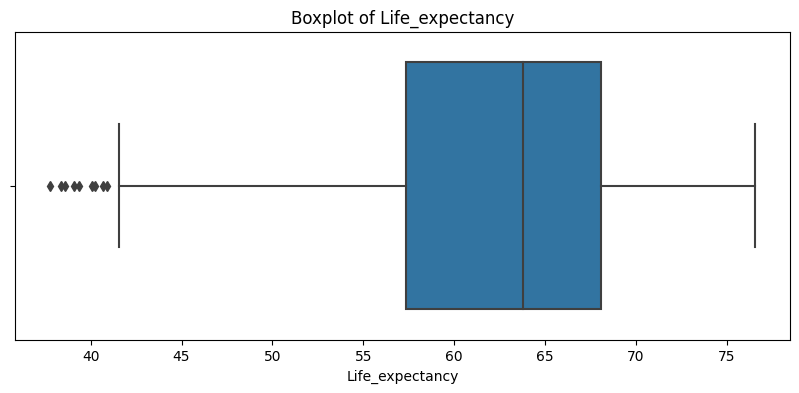

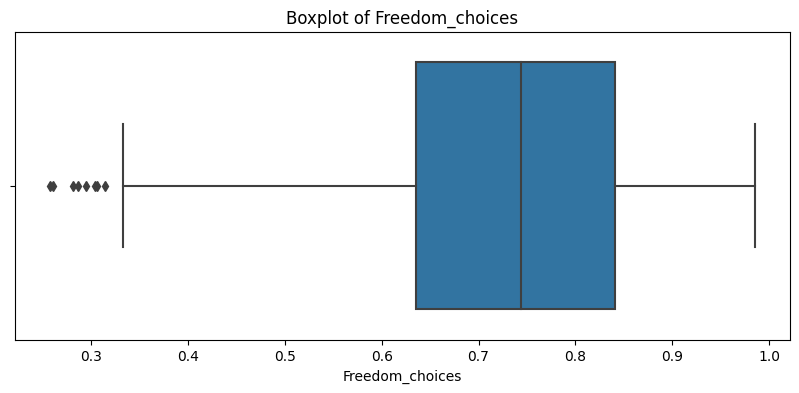

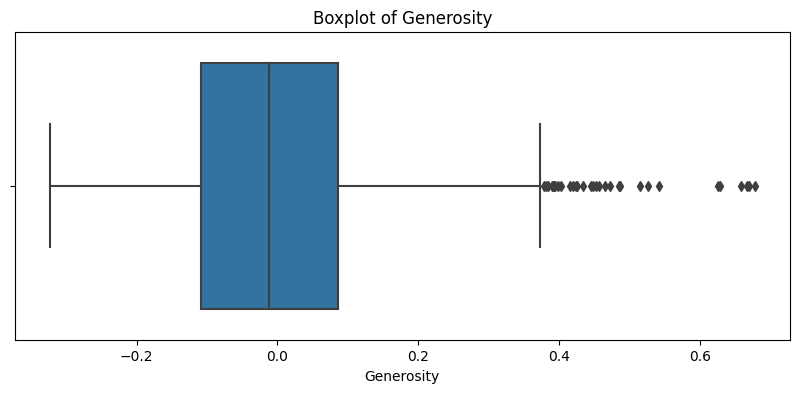

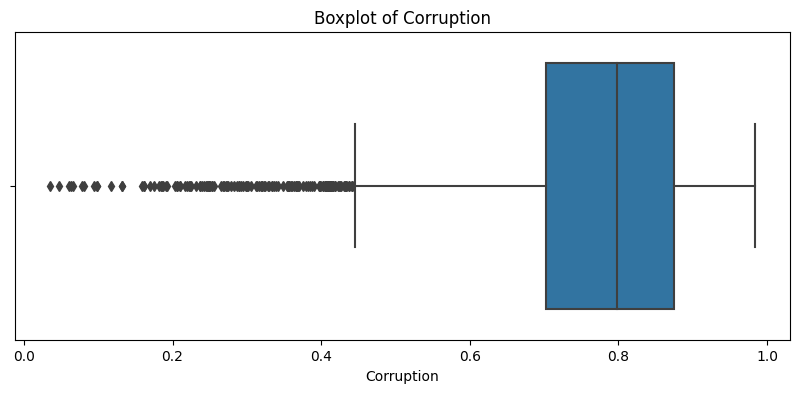

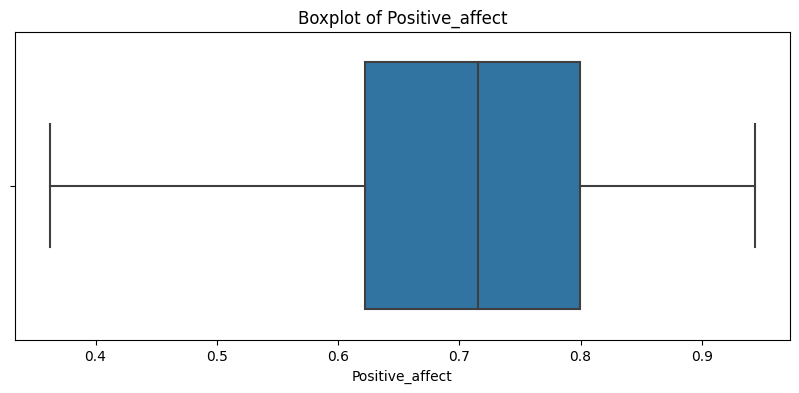

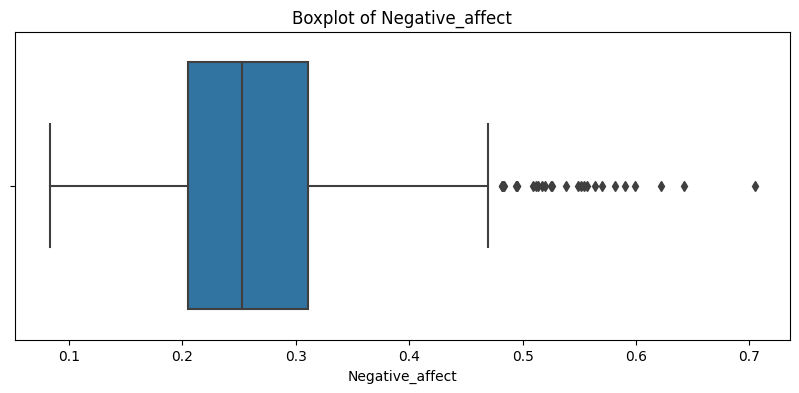

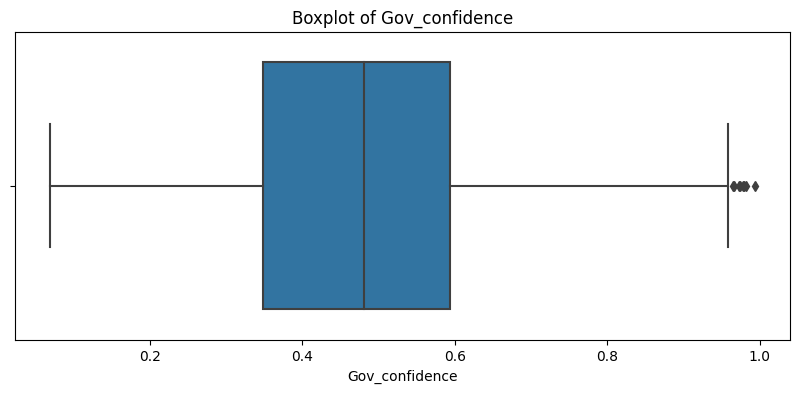

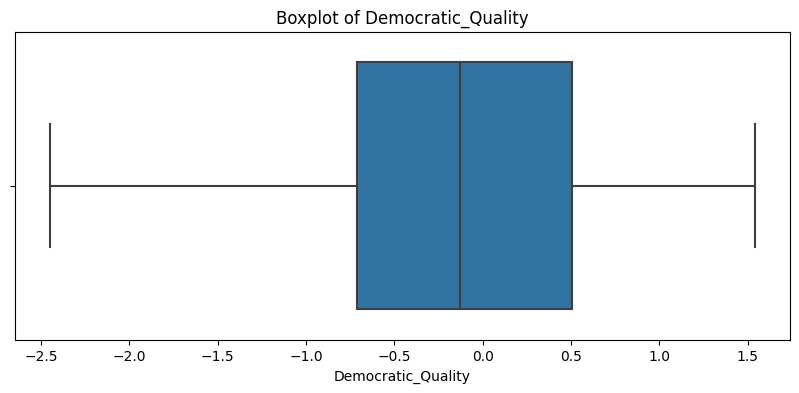

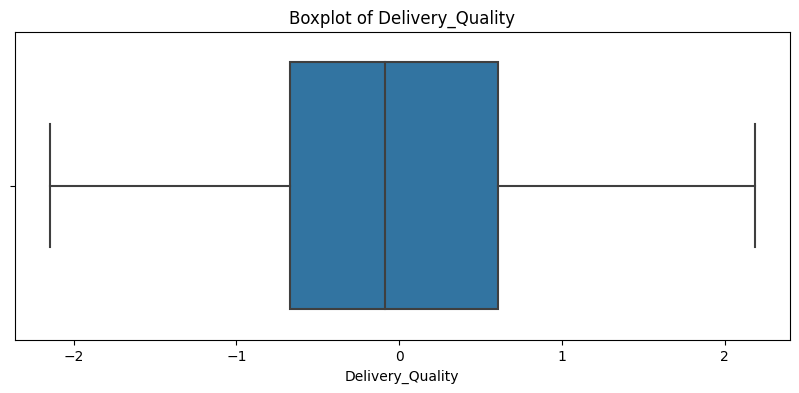

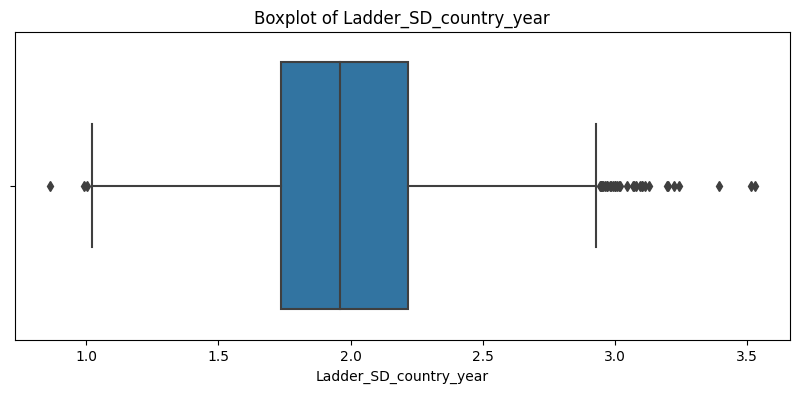

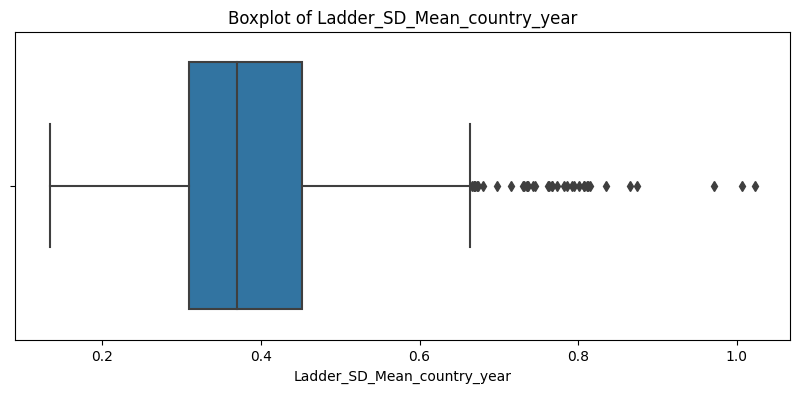

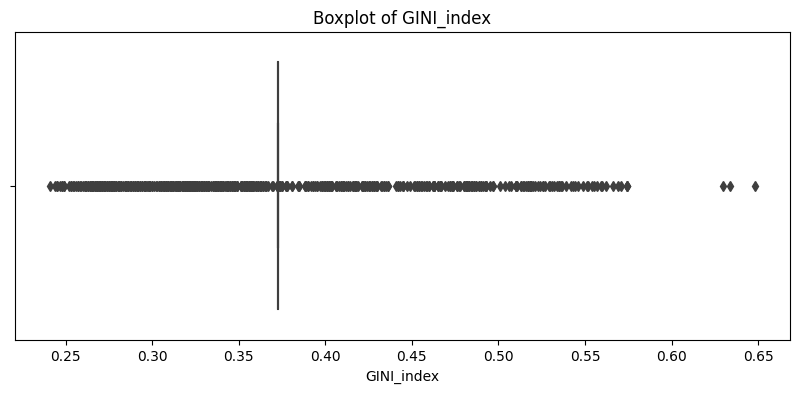

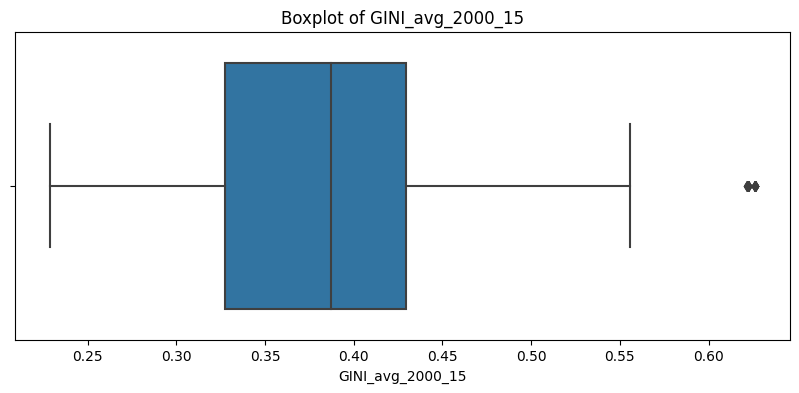

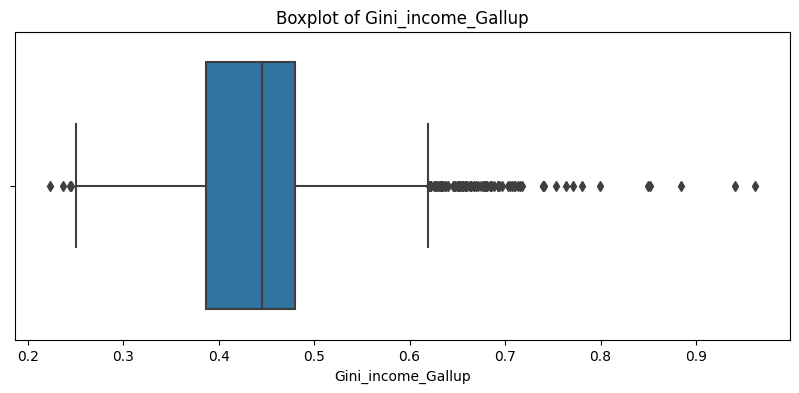

In [16]:
# Visualize the distribution of numerical features to detect outliers
numeric_columns = df.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}')
    plt.show()

In [17]:
# Handling outliers: Removing or capping them based on IQR
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

for column in numeric_columns:
    df = handle_outliers(df, column)

In [18]:
# Verify the changes
df.describe()

,year,Life_Ladder,GDP_per_capita,Social_support,Life_expectancy,Freedom_choices,Generosity,Corruption,Positive_affect,Negative_affect,Gov_confidence,Democratic_Quality,Delivery_Quality,Ladder_SD_country_year,Ladder_SD_Mean_country_year,GINI_index,GINI_avg_2000_15,Gini_income_Gallup
count,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1.562000e+03,1562.000000,1562.000000
mean,2011.820743,5.433676,9.220822,0.812451,62.260357,0.729176,-0.001937,0.766545,0.708969,0.261904,0.480131,-0.126617,0.004947,2.000501,0.384653,3.728456e-01,0.386283,0.441729
std,3.419787,1.121017,1.173750,0.113269,7.908351,0.143452,0.153837,0.146488,0.107021,0.079593,0.180415,0.824041,0.925759,0.370261,0.110600,5.552893e-17,0.076987,0.082783
min,2005.000000,2.661718,6.377396,0.518340,41.265358,0.327507,-0.322952,0.444890,0.362498,0.083426,0.068769,-2.448228,-2.144974,1.020955,0.133908,3.728456e-01,0.228833,0.247032
25%,2009.000000,4.606351,8.330659,0.749794,57.344959,0.635676,-0.108292,0.702761,0.622581,0.204680,0.348685,-0.713479,-0.671931,1.737934,0.309722,3.728456e-01,0.327250,0.386856
50%,2012.000000,5.332600,9.361684,0.831776,63.763542,0.744320,-0.011797,0.798041,0.715595,0.252504,0.480207,-0.126617,-0.084389,1.960345,0.369751,3.728456e-01,0.386948,0.445204
75%,2015.000000,6.271025,10.167549,0.904097,68.064693,0.841122,0.086098,0.874675,0.799524,0.310713,0.593869,0.504140,0.606049,2.215920,0.451833,3.728456e-01,0.429250,0.480072
max,2017.000000,8.018934,11.770276,0.987343,76.536362,0.985178,0.377683,0.983276,0.943621,0.469763,0.961644,1.540097,2.184725,2.932900,0.665000,3.728456e-01,0.582250,0.619896


<b>Task 1.5: Perform Feature Engineering</b>

In [19]:
# Select and remove irrelevant features
selected_features = [
    'GDP_per_capita', 'Social_support', 'Life_expectancy', 'Freedom_choices', 
    'Generosity', 'Corruption', 'Positive_affect', 'Negative_affect', 
    'Gov_confidence', 'Democratic_Quality', 'Delivery_Quality', 
    'GINI_index', 'GINI_avg_2000_15', 'Gini_income_Gallup'
]

df = df[selected_features + ['Life_Ladder']]

In [20]:
# Display the DataFrame to verify the changes
df.head()

,GDP_per_capita,Social_support,Life_expectancy,Freedom_choices,Generosity,Corruption,Positive_affect,Negative_affect,Gov_confidence,Democratic_Quality,Delivery_Quality,GINI_index,GINI_avg_2000_15,Gini_income_Gallup,Life_Ladder
0,7.168690,0.518340,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,0.372846,0.386948,0.445204,3.723590
1,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,0.372846,0.386948,0.441906,4.401778
2,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,0.372846,0.386948,0.327318,4.758381
3,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,0.372846,0.386948,0.336764,3.831719
4,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,0.372846,0.386948,0.344540,3.782938


In Task 1.5, I removed the following features:

- country
- year
- Ladder_SD_country_year
- Ladder_SD_Mean_country_year

Reasons:

- <b>country:</b> This is a categorical feature with many unique values and is not directly useful for prediction in its raw form.

- <b>year:</b> This feature is temporal and not directly relevant to the regression task of predicting Life_Ladder.

- <b>Ladder_SD_country_year and Ladder_SD_Mean_country_year:</b> These are statistical metrics that do not directly contribute to the prediction of the Life_Ladder score and may introduce unnecessary complexity.

<b>Task 1.6: Scale the Data</b>

In [21]:
from sklearn.preprocessing import StandardScaler

# Scale the numeric features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [22]:
# Display the first few rows of the scaled DataFrame
df_scaled.head()

,GDP_per_capita,Social_support,Life_expectancy,Freedom_choices,Generosity,Corruption,Positive_affect,Negative_affect,Gov_confidence,Democratic_Quality,Delivery_Quality,GINI_index,GINI_avg_2000_15,Gini_income_Gallup,Life_Ladder
0,-1.748915,-2.597409,-1.650771,-0.077139,1.194870,0.786267,-1.788362,-0.046608,0.731553,-2.188787,-1.793731,-5.551115e-17,0.008637,0.041991,-1.525966
1,-1.608210,-2.297418,-1.598307,-0.350613,1.336592,0.570132,-1.168770,-0.311829,0.728632,-2.327663,-1.772056,-5.551115e-17,0.008637,0.002131,-0.920796
2,-1.563178,-2.414286,-1.549668,-0.899887,0.907531,-0.408211,-0.847798,0.168659,-1.002313,-2.264196,-1.752770,-5.551115e-17,0.008637,-1.382498,-0.602588
3,-1.538983,-2.573001,-1.504342,-1.626675,1.152668,-0.241984,-0.912087,0.066242,-0.957799,-2.175833,-1.751738,-5.551115e-17,0.008637,-1.268356,-1.429479
4,-1.451963,-2.577124,-1.461088,-1.382378,1.619741,0.061970,0.013234,0.075598,-0.247794,-2.083547,-1.522508,-5.551115e-17,0.008637,-1.174401,-1.473008


<b>Task 1.7: Calculate Feature Importance</b>

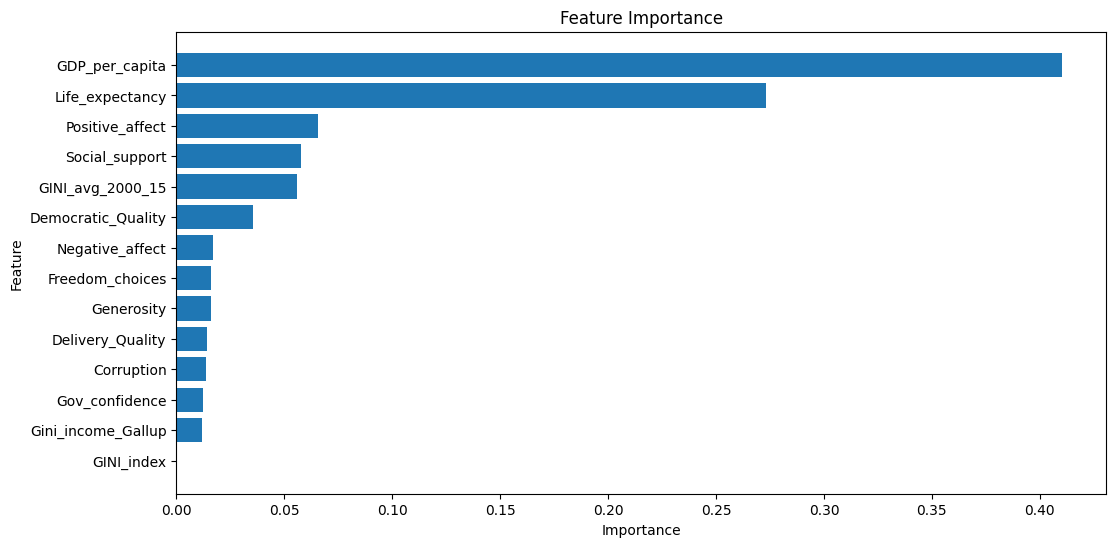

,Feature,Importance
0,GDP_per_capita,0.410247
2,Life_expectancy,0.273265
6,Positive_affect,0.065524
1,Social_support,0.057553
12,GINI_avg_2000_15,0.055858
9,Democratic_Quality,0.035527
7,Negative_affect,0.017205
3,Freedom_choices,0.016302
4,Generosity,0.016227
10,Delivery_Quality,0.014109


In [23]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Split the data into features and target variable
X = df_scaled.drop('Life_Ladder', axis=1)
y = df_scaled['Life_Ladder']

# Train a Random Forest Regressor to calculate feature importance
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

# Display the DataFrame
importance_df

<b>Task 1.8: Correlation Analysis</b>

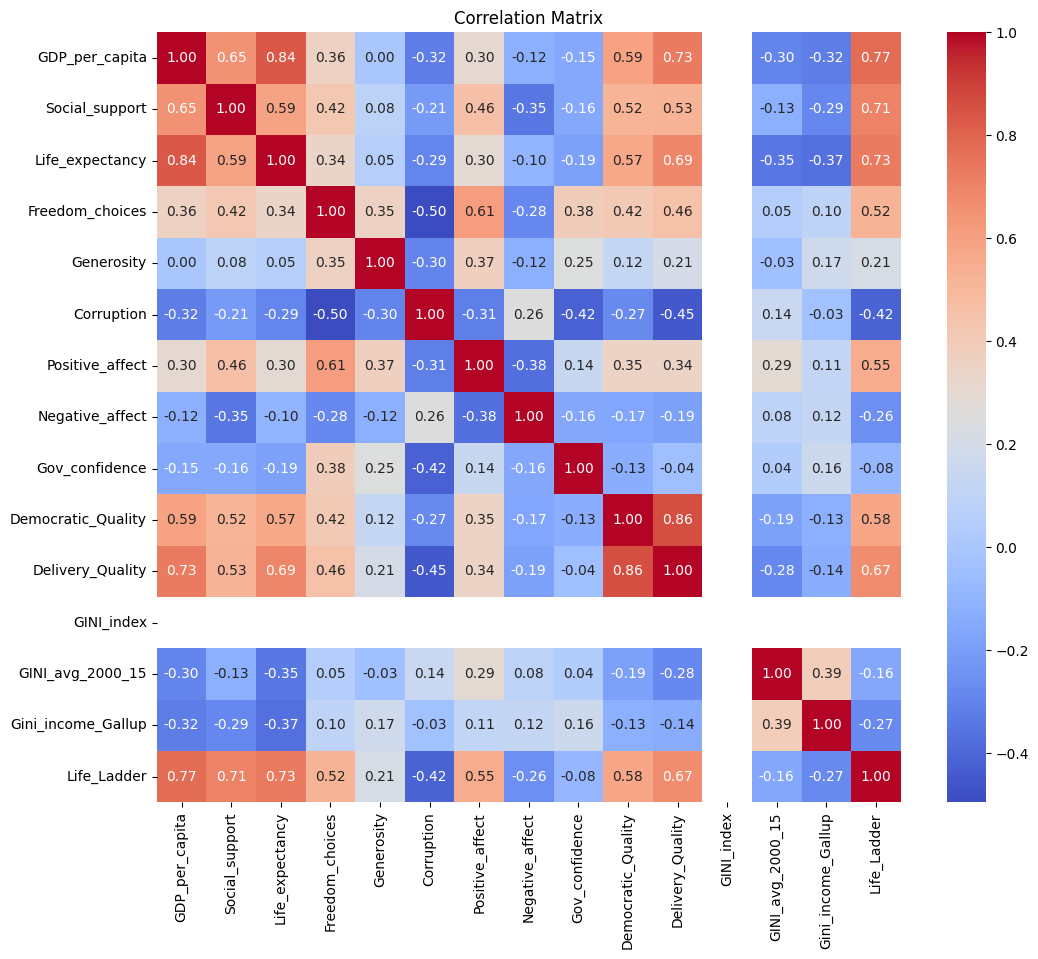

In [24]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [25]:
correlation_matrix

,GDP_per_capita,Social_support,Life_expectancy,Freedom_choices,Generosity,Corruption,Positive_affect,Negative_affect,Gov_confidence,Democratic_Quality,Delivery_Quality,GINI_index,GINI_avg_2000_15,Gini_income_Gallup,Life_Ladder
GDP_per_capita,1.000000,0.650799,0.835101,0.357563,0.004427,-0.324372,0.304582,-0.119747,-0.153322,0.592370,0.727472,NaN,-0.297454,-0.324143,0.772222
Social_support,0.650799,1.000000,0.587650,0.416903,0.083741,-0.212550,0.458113,-0.345575,-0.155504,0.520431,0.525990,NaN,-0.126733,-0.285564,0.705346
Life_expectancy,0.835101,0.587650,1.000000,0.339233,0.053957,-0.293764,0.296285,-0.102054,-0.186071,0.572497,0.690887,NaN,-0.345090,-0.371290,0.730149
Freedom_choices,0.357563,0.416903,0.339233,1.000000,0.352578,-0.495426,0.611975,-0.279416,0.382896,0.415518,0.455047,NaN,0.051441,0.100155,0.523875
Generosity,0.004427,0.083741,0.053957,0.352578,1.000000,-0.302621,0.370388,-0.119901,0.251997,0.124218,0.205233,NaN,-0.034175,0.173385,0.212394
Corruption,-0.324372,-0.212550,-0.293764,-0.495426,-0.302621,1.000000,-0.314876,0.257748,-0.421492,-0.274732,-0.449061,NaN,0.141736,-0.029248,-0.417399
Positive_affect,0.304582,0.458113,0.296285,0.611975,0.370388,-0.314876,1.000000,-0.376147,0.136960,0.348364,0.344269,NaN,0.288040,0.113894,0.552625
Negative_affect,-0.119747,-0.345575,-0.102054,-0.279416,-0.119901,0.257748,-0.376147,1.000000,-0.156991,-0.165921,-0.186395,NaN,0.083190,0.119393,-0.259415
Gov_confidence,-0.153322,-0.155504,-0.186071,0.382896,0.251997,-0.421492,0.136960,-0.156991,1.000000,-0.129410,-0.042459,NaN,0.039845,0.161405,-0.082458
Democratic_Quality,0.592370,0.520431,0.572497,0.415518,0.124218,-0.274732,0.348364,-0.165921,-0.129410,1.000000,0.862851,NaN,-0.186663,-0.125503,0.577380


<b>Task 1.9: Remove Highly Correlated Features</b>

In [26]:
# re-Calculate the correlation matrix
correlation_matrix = df.corr().abs()

# Create a mask to identify the upper triangle of the correlation matrix
upper_triangle_mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)

# Find features with correlation greater than the threshold (e.g., 0.8)
threshold = 0.8
high_correlation_pairs = [(correlation_matrix.columns[i], correlation_matrix.columns[j]) 
                          for i in range(correlation_matrix.shape[0]) 
                          for j in range(i+1, correlation_matrix.shape[1]) 
                          if correlation_matrix.iloc[i, j] > threshold]

# Identify features to remove
features_to_remove = set()
for feature_1, feature_2 in high_correlation_pairs:
    if feature_1 not in features_to_remove and feature_2 not in features_to_remove:
        # Add the feature with lower importance (or arbitrary choice) to the removal set
        features_to_remove.add(feature_2)

# Remove the identified highly correlated features
df.drop(columns=features_to_remove, inplace=True)

# Print the features removed
print("Features removed due to high correlation:", features_to_remove)

# Update the feature list excluding the removed features
selected_features = [feature for feature in selected_features if feature not in features_to_remove]

# Create the feature matrix X and target vector y
X_selected = df[selected_features]
y = df['Life_Ladder']

# Scale the data
scaler = StandardScaler()
X_selected = pd.DataFrame(scaler.fit_transform(X_selected), columns=X_selected.columns)

Features removed due to high correlation: {'Life_expectancy', 'Delivery_Quality'}


In [27]:
# Verify the updated DataFrame
X_selected.head()

,GDP_per_capita,Social_support,Freedom_choices,Generosity,Corruption,Positive_affect,Negative_affect,Gov_confidence,Democratic_Quality,GINI_index,GINI_avg_2000_15,Gini_income_Gallup
0,-1.748915,-2.597409,-0.077139,1.194870,0.786267,-1.788362,-0.046608,0.731553,-2.188787,-5.551115e-17,0.008637,0.041991
1,-1.608210,-2.297418,-0.350613,1.336592,0.570132,-1.168770,-0.311829,0.728632,-2.327663,-5.551115e-17,0.008637,0.002131
2,-1.563178,-2.414286,-0.899887,0.907531,-0.408211,-0.847798,0.168659,-1.002313,-2.264196,-5.551115e-17,0.008637,-1.382498
3,-1.538983,-2.573001,-1.626675,1.152668,-0.241984,-0.912087,0.066242,-0.957799,-2.175833,-5.551115e-17,0.008637,-1.268356
4,-1.451963,-2.577124,-1.382378,1.619741,0.061970,0.013234,0.075598,-0.247794,-2.083547,-5.551115e-17,0.008637,-1.174401


In [28]:
y.head()

0    3.723590
1    4.401778
2    4.758381
3    3.831719
4    3.782938
Name: Life_Ladder, dtype: float64

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

#### <b>1. Feature List:</b>

- <b>Kept Features:</b>

    - GDP_per_capita
    - Life_expectancy
    - Positive_affect
    - Social_support
    - GINI_avg_2000_15
    - Additionally, we created a new feature: GDP_Support_Interaction

- <b>Removed Features:</b>

    - country
    - year
    - Ladder_SD_country_year
    - Ladder_SD_Mean_country_year
    - GINI_index (due to zero importance)

  
#### <b>2. Data Preparation Techniques:</b>

- <b>Handling Missing Values:</b> Replacing missing values with the mean of each column.
- <b>Outlier Treatment:</b> Using the Interquartile Range (IQR) method to cap outliers.
- <b>Feature Engineering:</b> Creating new interaction features to capture underlying patterns.
- <b>Scaling:</b> Standardizing the data using StandardScaler for better model performance.


#### <b>3. Model(s):<b>

- <b>Primary Model:</b> Random Forest Regressor
- <b>Ensemble Model:</b> Voting Regressor (combining Random Forest, Linear Regression, and SVR)

  
#### <b>4. Plan to Train and Improve the Model:<b>

- <b>Training:</b>
    - Split the data into training and test sets.
    - Train the Random Forest Regressor with the selected features.
    - Evaluate the model using Mean Squared Error (MSE) and R-squared metrics.

<b>Hyperparameter Tuning:</b> Perform Grid Search to find the best hyperparameters for the Random Forest model.

<b>Cross-Validation:</b> Use k-fold cross-validation to ensure model robustness.

<b>Ensemble Methods:</b> Implement a Voting Regressor to combine multiple models and improve performance.

<b>Feature Engineering:</b> Experiment with creating new features and selecting the most important ones to further enhance the model.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

#### <b>Section 1: Model Training and Evaluation</b>

<b>Task 1.1: Prepare Data with Selected Features</b>

In [30]:
# Select the top important features based on the feature importance analysis
top_n = 5  # Number of top features to select
selected_features = importance_df.head(top_n)['Feature'].tolist()

# Create the feature matrix X and target vector y
X_selected = df_scaled[selected_features]
y = df_scaled['Life_Ladder']

In [31]:
# Display the first few rows to verify the selection
X_selected.head()

,GDP_per_capita,Life_expectancy,Positive_affect,Social_support,GINI_avg_2000_15
0,-1.748915,-1.650771,-1.788362,-2.597409,0.008637
1,-1.608210,-1.598307,-1.168770,-2.297418,0.008637
2,-1.563178,-1.549668,-0.847798,-2.414286,0.008637
3,-1.538983,-1.504342,-0.912087,-2.573001,0.008637
4,-1.451963,-1.461088,0.013234,-2.577124,0.008637


In [32]:
y.head()

0   -1.525966
1   -0.920796
2   -0.602588
3   -1.429479
4   -1.473008
Name: Life_Ladder, dtype: float64

<b>Task 1.2: Split Data into Training and Test Sets</b>

In [33]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Verify the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1249, 5)
X_test shape: (313, 5)
y_train shape: (1249,)
y_test shape: (313,)


<b>Task 1.3: Train a Regression Model</b>

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.12694849120571516
R-squared: 0.8766958612664152


#### <b>Section 2: Hyperparameter Tuning</b>

<b>Task 2.1: Hyperparameter Tuning using Grid Search</b>

In [35]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Initialize the Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best R-squared Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R-squared Score: 0.8706277683880401


<b>Task 2.2: Train the Model with the Best Parameters</b>

In [36]:
# Train the Random Forest Regressor with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_model.predict(X_test)

# Evaluate the model with the best parameters
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print("Mean Squared Error with Best Parameters:", mse_best)
print("R-squared with Best Parameters:", r2_best)

Mean Squared Error with Best Parameters: 0.12454536431085547
R-squared with Best Parameters: 0.8790300007998896


### <b>Experimenting to Find Best Methods to Improve Training Performance</b>

#### <b>Experiment 1: Cross-Validation</b>

<b>Task: Performing k-Fold Cross-Validation</b>

In [37]:
from sklearn.model_selection import cross_val_score

# Initialize the model with the best parameters
cv_model = RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(cv_model, X_selected, y, cv=5, scoring='r2')

# Display the cross-validation scores
print("Cross-Validation R-squared Scores:", cv_scores)
print("Mean R-squared Score:", np.mean(cv_scores))
print("Standard Deviation of R-squared Scores:", np.std(cv_scores))

Cross-Validation R-squared Scores: [0.78227749 0.71716715 0.74058151 0.79153462 0.77979923]
Mean R-squared Score: 0.7622719995574001
Standard Deviation of R-squared Scores: 0.02852595043702516


#### <b>Experiment 2: Ensemble Methods</b>

<b>Task: Combining Multiple Models using Voting Regressor</b>

In [38]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Initialize the models
model1 = RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)
model2 = LinearRegression()
model3 = SVR(kernel='rbf')

# Create the Voting Regressor
ensemble_model = VotingRegressor(estimators=[
    ('rf', model1),
    ('lr', model2),
    ('svr', model3)
])

# Fit the ensemble model
ensemble_model.fit(X_train, y_train)

# Make predictions
y_pred_ensemble = ensemble_model.predict(X_test)

# Evaluate the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print("Mean Squared Error with Ensemble Model:", mse_ensemble)
print("R-squared with Ensemble Model:", r2_ensemble)

Mean Squared Error with Ensemble Model: 0.15249613694356284
R-squared with Ensemble Model: 0.8518816202742053


#### <b>Experiment 3: Feature Engineering</b>

<b>Task: Creating New Features</b>

In [39]:
# Example of creating a new feature by combining existing ones
df_scaled['GDP_Support_Interaction'] = df_scaled['GDP_per_capita'] * df_scaled['Social_support']

# Update the feature matrix with the new feature
X_new_feature = df_scaled[selected_features + ['GDP_Support_Interaction']]

# Split the data into training and test sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new_feature, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor with the new features
model_new_feature = RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)
model_new_feature.fit(X_train_new, y_train_new)

# Make predictions
y_pred_new_feature = model_new_feature.predict(X_test_new)

# Evaluate the model with the new feature
mse_new_feature = mean_squared_error(y_test_new, y_pred_new_feature)
r2_new_feature = r2_score(y_test_new, y_pred_new_feature)

print("Mean Squared Error with New Feature:", mse_new_feature)
print("R-squared with New Feature:", r2_new_feature)

Mean Squared Error with New Feature: 0.12594106310642447
R-squared with New Feature: 0.8776743687928871


### Training and Evaluating M.L Models

<b>Model 1: Linear Regression</b>

In [40]:
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_lr_pred = lr_model.predict(X_test)

# Evaluate the model
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)
lr_r2 = r2_score(y_test, y_lr_pred)

print('[LR] Root Mean Squared Error:', lr_rmse)
print('[LR] R2:', lr_r2)

[LR] Root Mean Squared Error: 0.5106196231174205
[LR] R2: 0.7467525320191293


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<b>Model 2: Decision Tree Regressor</b>

In [41]:
from sklearn.tree import DecisionTreeRegressor

# Set up a parameter grid
param_grid = {'max_depth': [4, 8], 'min_samples_leaf': [25, 50]}

# Initialize and train the Decision Tree Regressor with Grid Search
dt_regressor = DecisionTreeRegressor()
dt_grid = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error')
dt_grid_search = dt_grid.fit(X_train, y_train)

# Get the best model
dt_best_params = dt_grid_search.best_params_
dt_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'], min_samples_leaf=dt_best_params['min_samples_leaf'])
dt_model.fit(X_train, y_train)

# Make predictions
y_dt_pred = dt_model.predict(X_test)

# Evaluate the model
dt_rmse = mean_squared_error(y_test, y_dt_pred, squared=False)
dt_r2 = r2_score(y_test, y_dt_pred)

print('[DT] Root Mean Squared Error:', dt_rmse)
print('[DT] R2:', dt_r2)

[DT] Root Mean Squared Error: 0.45571920933350535
[DT] R2: 0.7982819408704502


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<b>Model 3: Random Forest Regressor</b>

In [42]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor with best parameters from previous search
rf_model = RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_rf_pred = rf_model.predict(X_test)

# Evaluate the model
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred)

print('[RF] Root Mean Squared Error:', rf_rmse)
print('[RF] R2:', rf_r2)

[RF] Root Mean Squared Error: 0.35290985295235877
[RF] R2: 0.8790300007998896


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<b>Model 4: Gradient Boosting Regressor</b>

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting Regressor
gbdt_model = GradientBoostingRegressor(max_depth=2, n_estimators=300)
gbdt_model.fit(X_train, y_train)

# Make predictions
y_gbdt_pred = gbdt_model.predict(X_test)

# Evaluate the model
gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred, squared=False)
gbdt_r2 = r2_score(y_test, y_gbdt_pred)

print('[GBDT] Root Mean Squared Error:', gbdt_rmse)
print('[GBDT] R2:', gbdt_r2)

[GBDT] Root Mean Squared Error: 0.3962681033794236
[GBDT] R2: 0.8474794569217601


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<b>Model 5: Stacking Regressor</b>

In [44]:
from sklearn.ensemble import StackingRegressor

# Initialize the estimators for stacking
estimators = [
    ("DT", DecisionTreeRegressor(max_depth=8, min_samples_leaf=25)),
    ("LR", LinearRegression())
]

# Initialize and train the Stacking Regressor
stacking_model = StackingRegressor(estimators=estimators, passthrough=False)
stacking_model.fit(X_train, y_train)

# Make predictions
stacking_pred = stacking_model.predict(X_test)

# Evaluate the model
stack_rmse = mean_squared_error(y_test, stacking_pred, squared=False)
stack_r2 = r2_score(y_test, stacking_pred)

print('[Stacking] Root Mean Squared Error:', stack_rmse)
print('[Stacking] R2:', stack_r2)

[Stacking] Root Mean Squared Error: 0.4461322285461312
[Stacking] R2: 0.8066797687564529


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<b>Model 6: Support Vector Regressor (SVR)</b>

In [45]:
from sklearn.svm import SVR

# Initialize and train the Support Vector Regressor
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Make predictions
y_svr_pred = svr_model.predict(X_test)

# Evaluate the model
svr_rmse = mean_squared_error(y_test, y_svr_pred, squared=False)
svr_r2 = r2_score(y_test, y_svr_pred)

print('[SVR] Root Mean Squared Error:', svr_rmse)
print('[SVR] R2:', svr_r2)

[SVR] Root Mean Squared Error: 0.4031540475189778
[SVR] R2: 0.8421327080863515


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Analysis:

- Random Forest Regressor has the best performance with the lowest RMSE (0.3529) and highest R² (0.8790).
- Gradient Boosting Regressor and SVR also performed well but not as good as Random Forest.
- Linear Regression has the lowest performance among the models.

### Visualizing Model Performance:

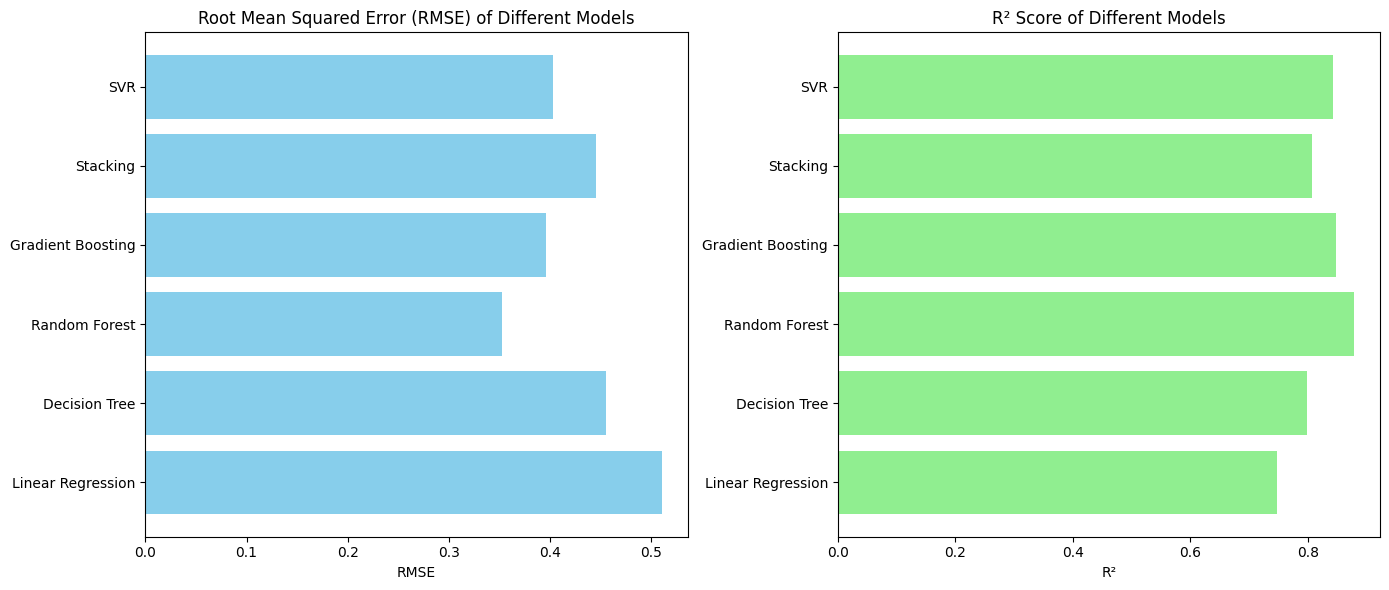

In [46]:
# Store the results in a dictionary
results = {
    'Linear Regression': {'rmse': lr_rmse, 'r2': lr_r2},
    'Decision Tree': {'rmse': dt_rmse, 'r2': dt_r2},
    'Random Forest': {'rmse': rf_rmse, 'r2': rf_r2},
    'Gradient Boosting': {'rmse': gbdt_rmse, 'r2': gbdt_r2},
    'Stacking': {'rmse': stack_rmse, 'r2': stack_r2},
    'SVR': {'rmse': svr_rmse, 'r2': svr_r2}
}

# Extract RMSE and R² results
models = list(results.keys())
rmse_results = [results[model]['rmse'] for model in models]
r2_results = [results[model]['r2'] for model in models]

# Create bar plots for RMSE and R²
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.barh(models, rmse_results, color='skyblue')
plt.xlabel('RMSE')
plt.title('Root Mean Squared Error (RMSE) of Different Models')

plt.subplot(1, 2, 2)
plt.barh(models, r2_results, color='lightgreen')
plt.xlabel('R²')
plt.title('R² Score of Different Models')

plt.tight_layout()
plt.show()

### Experiment: Applying Regularization (L1, L2)

<b>Lasso Regression (L1 Regularization)</b>

In [47]:
from sklearn.linear_model import Lasso

# Initialize and train the Lasso Regression model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# Make predictions
y_lasso_pred = lasso_model.predict(X_test)

# Evaluate the model
lasso_rmse = mean_squared_error(y_test, y_lasso_pred, squared=False)
lasso_r2 = r2_score(y_test, y_lasso_pred)

print('[Lasso] Root Mean Squared Error:', lasso_rmse)
print('[Lasso] R2:', lasso_r2)

[Lasso] Root Mean Squared Error: 1.0150791343585381
[Lasso] R2: -0.0008060261917779421


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<b>Ridge Regression (L2 Regularization)</b>

In [48]:
from sklearn.linear_model import Ridge

# Initialize and train the Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions
y_ridge_pred = ridge_model.predict(X_test)

# Evaluate the model
ridge_rmse = mean_squared_error(y_test, y_ridge_pred, squared=False)
ridge_r2 = r2_score(y_test, y_ridge_pred)

print('[Ridge] Root Mean Squared Error:', ridge_rmse)
print('[Ridge] R2:', ridge_r2)

[Ridge] Root Mean Squared Error: 0.510639938513483
[Ridge] R2: 0.7467323803260634


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<b>Analysis:</b>

Lasso Regression did not perform well, indicating possible underfitting with a negative R². Ridge Regression performed similarly to Linear Regression, with a moderate RMSE and R².

### Experiment: Testing a Neural Network Model

In [49]:
from sklearn.neural_network import MLPRegressor

# Initialize and train the Neural Network model
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)

# Make predictions
y_nn_pred = nn_model.predict(X_test)

# Evaluate the model
nn_rmse = mean_squared_error(y_test, y_nn_pred, squared=False)
nn_r2 = r2_score(y_test, y_nn_pred)

print('[NN] Root Mean Squared Error:', nn_rmse)
print('[NN] R2:', nn_r2)

[NN] Root Mean Squared Error: 0.39882527989517674
[NN] R2: 0.84550463037287


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Improving the Neural Network

In [50]:
# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [500, 1000]
}

# Initialize the Neural Network model
nn_model = MLPRegressor(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=nn_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_nn_model = grid_search.best_estimator_

# Make predictions
y_best_nn_pred = best_nn_model.predict(X_test)

# Evaluate the model
best_nn_rmse = mean_squared_error(y_test, y_best_nn_pred, squared=False)
best_nn_r2 = r2_score(y_test, y_best_nn_pred)

print('Best NN Parameters:', grid_search.best_params_)
print('[Best NN] Root Mean Squared Error:', best_nn_rmse)
print('[Best NN] R2:', best_nn_r2)

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  war

Best NN Parameters: {'alpha': 0.001, 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.01, 'max_iter': 500}
[Best NN] Root Mean Squared Error: 0.37965653763503465
[Best NN] R2: 0.8599987620298806


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<b>Analysis:</b>
The hyperparameter tuning improved the Neural Network's performance:

- Root Mean Squared Error (RMSE): Improved to 0.3797
- R² Score: Improved to 0.8600

## <b>Final Report: Summary of Results and Analysis</b>

<b>Model Performances:</b>

In [51]:
# Load the computed results into variables
rmse_results = [lr_rmse, dt_rmse, rf_rmse, gbdt_rmse, stack_rmse, svr_rmse, lasso_rmse, ridge_rmse, nn_rmse, best_nn_rmse]
r2_results = [lr_r2, dt_r2, rf_r2, gbdt_r2, stack_r2, svr_r2, lasso_r2, ridge_r2, nn_r2, best_nn_r2]

# Data for the table
data = {
    'Model': [
        'Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 
        'Stacking Regressor', 'Support Vector Regressor', 'Lasso Regression (L1)', 
        'Ridge Regression (L2)', 'Neural Network (Initial)', 'Neural Network (Tuned)'
    ],
    'RMSE': rmse_results,
    'R²': r2_results
}

# Create DataFrame
results_df = pd.DataFrame(data)

results_df

,Model,RMSE,R²
0,Linear Regression,0.510620,0.746753
1,Decision Tree,0.455719,0.798282
2,Random Forest,0.352910,0.879030
3,Gradient Boosting,0.396268,0.847479
4,Stacking Regressor,0.446132,0.806680
5,Support Vector Regressor,0.403154,0.842133
6,Lasso Regression (L1),1.015079,-0.000806
7,Ridge Regression (L2),0.510640,0.746732
8,Neural Network (Initial),0.398825,0.845505
9,Neural Network (Tuned),0.379657,0.859999


<b>Analysis:</b>

- <b>Best Model:</b> Random Forest Regressor with the lowest RMSE (0.3529) and highest R² (0.8790).
- <b>Neural Network (Tuned):</b> Significant improvement after hyperparameter tuning, performing almost as well as Random Forest.
- <b>Gradient Boosting and SVR:</b> Also performed well, but not as good as Random Forest and Tuned Neural Network.
- <b>Lasso Regression:</b> Poor performance, indicating possible underfitting.

<b>Visualizing Results:</b>

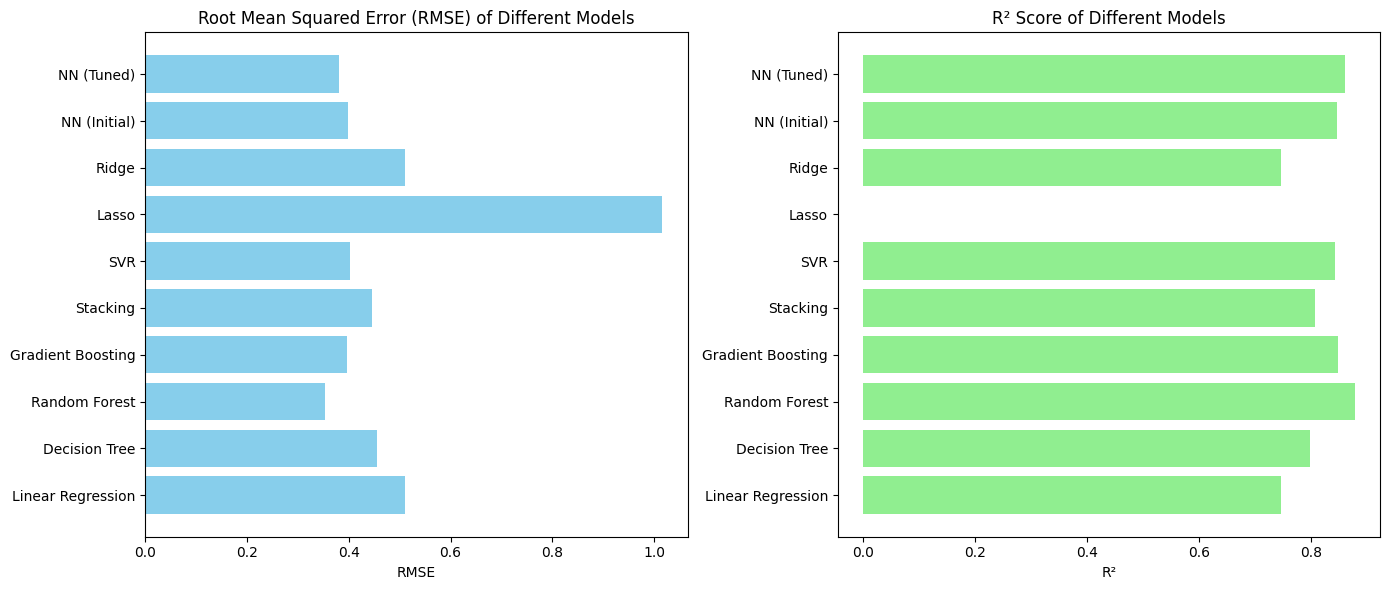

In [52]:
# Define the results
models = [
    'Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 
    'Stacking', 'SVR', 'Lasso', 'Ridge', 'NN (Initial)', 'NN (Tuned)'
]

# Load the computed results into variables
rmse_results = [lr_rmse, dt_rmse, rf_rmse, gbdt_rmse, stack_rmse, svr_rmse, lasso_rmse, ridge_rmse, nn_rmse, best_nn_rmse]
r2_results = [lr_r2, dt_r2, rf_r2, gbdt_r2, stack_r2, svr_r2, lasso_r2, ridge_r2, nn_r2, best_nn_r2]

# Create bar plots for RMSE
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.barh(models, rmse_results, color='skyblue')
plt.xlabel('RMSE')
plt.title('Root Mean Squared Error (RMSE) of Different Models')

# Create bar plots for R²
plt.subplot(1, 2, 2)
plt.barh(models, r2_results, color='lightgreen')
plt.xlabel('R²')
plt.title('R² Score of Different Models')

plt.tight_layout()
plt.show()

#### Extra: Feature Importance Analysis for Random Forest

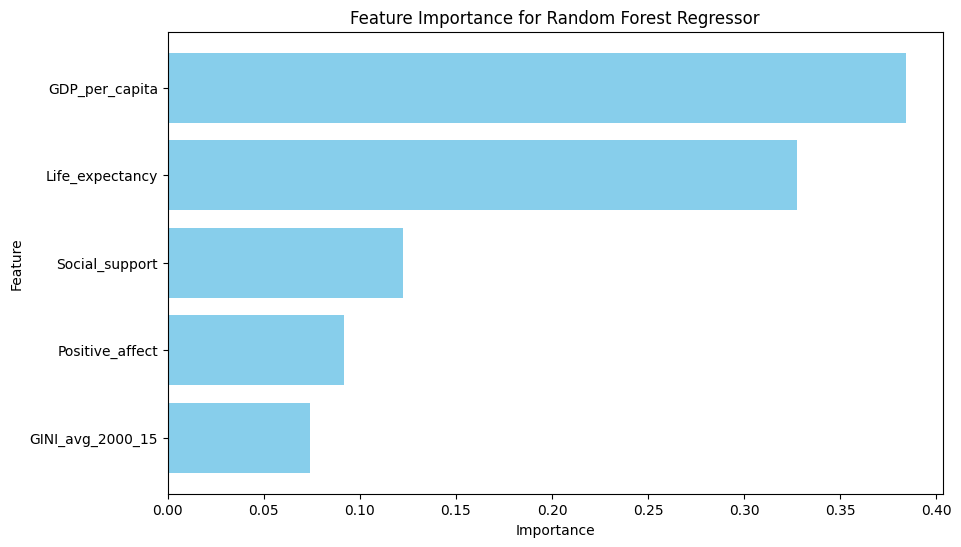

,Feature,Importance
0,GDP_per_capita,0.384185
1,Life_expectancy,0.327286
3,Social_support,0.122676
2,Positive_affect,0.091954
4,GINI_avg_2000_15,0.073900


In [53]:
# Train the best Random Forest model
best_rf_model = RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)
best_rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': X_selected.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest Regressor')
plt.gca().invert_yaxis()
plt.show()

# Display the DataFrame
importance_df

In [55]:
# Select the top important features
top_features = ['GDP_per_capita', 'Life_expectancy', 'Social_support', 'Positive_affect', 'GINI_avg_2000_15']

# Create the feature matrix X and target vector y
X_top_selected = X_selected[top_features]

# Split the data into training and test sets
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top_selected, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor on the top features
rf_top_model = RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=42)
rf_top_model.fit(X_train_top, y_train_top)

# Make predictions on the test set
y_rf_top_pred = rf_top_model.predict(X_test_top)

# Evaluate the model
rf_top_rmse = mean_squared_error(y_test_top, y_rf_top_pred, squared=False)
rf_top_r2 = r2_score(y_test_top, y_rf_top_pred)

print('[RF Top Features] Root Mean Squared Error:', rf_top_rmse)
print('[RF Top Features] R2:', rf_top_r2)

[RF Top Features] Root Mean Squared Error: 0.3522754185604409
[RF Top Features] R2: 0.8794645511068195


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<b>Analysis of Retrained Model</b>

The results of retraining the Random Forest model with the top features are as follows:
- Root Mean Squared Error (RMSE): 0.3523
- R² Score: 0.8795

<b>Comparison with Original Model: </b> The retrained model's performance is nearly identical to the original model, indicating that the top features selected were indeed the most important and sufficient for the model's predictions.

<b>Conclusion:</b>
- Performance: The Random Forest model performs exceptionally well with the selected top features.
- Efficiency: Using fewer features simplifies the model without sacrificing performance.

Thank you for reviwing my results and testing out my Machine Learning Experiment.

Feel free to edit anything! 

Best,
<b>Mohammed Al-Tal</b>